In [45]:
!python --version

Python 3.9.7


In [46]:
!pip install nlp

In [47]:
!pip install tensorflow

In [48]:
!pip install matplotlib

In [49]:
!pip install pyreadstat

In [50]:
!pip install nltk

In [51]:
!pip install sklearn

In [52]:
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.text import Tokenizer 

def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()
   
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [53]:
df = pd.read_csv('G:\My Drive\AnjanaValsalan_ECNG 3020\Implementation Files\ISEAR csv\ISEAR.csv')

In [54]:
df.head(5)

,emotion,sentence,Unnamed: 2
0,joy,On days when I feel close to my partner and ot...,NaN
1,fear,Every time I imagine that someone I love or I ...,NaN
2,anger,When I had been obviously unjustly treated and...,NaN
3,sadness,When I think about the short time that we live...,NaN
4,disgust,At a gathering I found myself involuntarily si...,NaN


In [55]:
df.dropna(axis=1, how="any", thresh=None, subset=None, inplace=True)

In [56]:
df.head(5)

,emotion,sentence
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [57]:
train_size=0.8

text = df.drop(columns = ['emotion']).copy()
label = df['emotion']

text_train, text_rem, label_train, label_rem = train_test_split(text,label, train_size=0.8)

test_size = 0.5
text_valid, text_test, label_valid, label_test = train_test_split(text_rem,label_rem,train_size=0.5)

print(text_train.shape), print(label_train.shape)
print(text_valid.shape), print(label_valid.shape)
print(text_test.shape), print(label_test.shape)

(6012, 1)
(6012,)
(752, 1)
(752,)
(752, 1)
(752,)


(None, None)

In [58]:
label_test

4728    disgust
5336      guilt
517     sadness
1853    sadness
5981    sadness
         ...   
6436    sadness
4949       fear
3316    sadness
6024      guilt
1427       fear
Name: emotion, Length: 752, dtype: object

In [59]:
text_train_list=[ i[0] for i in text_train.values.tolist()]

In [60]:
tokenizer = Tokenizer(num_words=1000000, oov_token='<UNK>')
tokenizer.fit_on_texts([text_train_list[1]])

In [61]:
tokenizer.texts_to_sequences([text_train_list[1]])

[[4, 5, 6, 2, 7, 2, 3, 8, 9, 10, 11, 12, 3, 13, 14]]

In [62]:
text_train_list[1]

'When I was face to face with my deceived friend after sleeping  \nwith his wife.'

<function matplotlib.pyplot.show(close=None, block=None)>

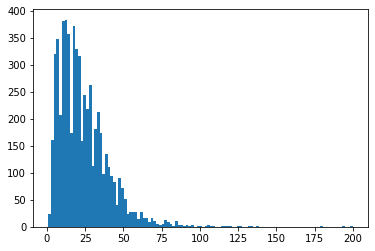

In [63]:
lengths = [len(t.split(' ')) for t in text_train_list]
plt.hist(lengths, bins = len(set(lengths)))
plt.show

In [64]:
max_length = 200
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
def get_sequences(tokenizer, text_train_list):
    sequences = tokenizer.texts_to_sequences(text_train_list)
    padded = pad_sequences(sequences, truncating='post', padding='post', maxlen = max_length)
    return padded

In [66]:
padded_train_seq = get_sequences(tokenizer,text_train_list)

In [67]:
padded_train_seq

array([[4, 1, 1, ..., 0, 0, 0],
       [4, 5, 6, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [5, 6, 1, ..., 0, 0, 0],
       [4, 5, 6, ..., 0, 0, 0]])

In [68]:
classes = set(label_train)
print(classes)

{'disgust', 'guilt', 'sadness', 'joy', 'fear', 'shame', 'anger'}


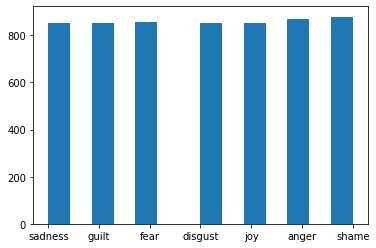

In [69]:
plt.hist(label_train, bins=14)
plt.show()

In [70]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [71]:
class_to_index

{'disgust': 0,
 'guilt': 1,
 'sadness': 2,
 'joy': 3,
 'fear': 4,
 'shame': 5,
 'anger': 6}

In [72]:
index_to_class

{0: 'disgust',
 1: 'guilt',
 2: 'sadness',
 3: 'joy',
 4: 'fear',
 5: 'shame',
 6: 'anger'}

In [73]:
names_to_ids = lambda label_train: np.array([class_to_index.get(x) for x in label_train])

In [74]:
train_labels = names_to_ids(label_train)
print(train_labels[0])

2


In [75]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(7517, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(7, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = optimizer,
    metrics=['accuracy']
)

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 16)           120272    
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 40)          5920      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 7)                 287       
                                                                 
Total params: 136,239
Trainable params: 136,239
Non-trainable params: 0
_________________________________________________________________


In [77]:
text_valid_list=[ i[0] for i in text_valid.values.tolist()]

In [78]:
text_val_seq = get_sequences(tokenizer, text_valid_list)

In [79]:
train_labels

array([2, 1, 4, ..., 3, 5, 4])

In [80]:
label_valid = names_to_ids(label_valid)

In [81]:
label_valid

array([3, 0, 0, 1, 1, 0, 0, 4, 5, 5, 2, 4, 5, 2, 4, 6, 1, 5, 4, 2, 1, 2,
       1, 0, 2, 2, 3, 5, 6, 6, 4, 0, 3, 2, 4, 5, 1, 5, 3, 6, 0, 6, 6, 2,
       4, 4, 4, 6, 2, 1, 6, 1, 2, 2, 6, 6, 3, 6, 0, 2, 1, 4, 4, 1, 3, 0,
       3, 2, 1, 1, 3, 4, 5, 6, 3, 3, 1, 1, 6, 5, 2, 4, 4, 3, 4, 3, 6, 3,
       5, 3, 2, 3, 3, 4, 1, 2, 1, 2, 2, 0, 3, 5, 4, 3, 4, 5, 6, 3, 4, 1,
       0, 0, 5, 5, 0, 3, 3, 0, 1, 3, 2, 6, 5, 4, 4, 4, 2, 4, 2, 3, 6, 6,
       2, 3, 3, 3, 1, 2, 0, 6, 3, 0, 3, 5, 1, 5, 5, 6, 1, 2, 2, 3, 2, 3,
       5, 4, 2, 2, 2, 6, 3, 2, 6, 4, 0, 6, 0, 0, 6, 3, 3, 3, 2, 2, 3, 6,
       5, 0, 1, 0, 1, 2, 1, 2, 4, 0, 4, 6, 3, 0, 4, 1, 3, 3, 6, 2, 0, 3,
       3, 5, 6, 1, 4, 2, 6, 2, 6, 4, 5, 0, 0, 6, 4, 4, 3, 4, 6, 6, 0, 5,
       0, 5, 5, 4, 3, 2, 5, 5, 6, 5, 0, 3, 6, 1, 0, 5, 5, 4, 2, 1, 2, 5,
       5, 2, 3, 5, 3, 1, 1, 2, 4, 0, 0, 3, 4, 0, 3, 0, 4, 0, 5, 2, 4, 1,
       0, 0, 1, 4, 3, 6, 0, 0, 6, 6, 0, 6, 2, 2, 0, 0, 3, 0, 6, 5, 3, 4,
       5, 1, 5, 6, 5, 4, 4, 5, 2, 1, 5, 2, 0, 0, 3,

In [89]:
h = model.fit(
padded_train_seq, train_labels,
validation_data=(text_val_seq, label_valid),
batch_size = 10,
epochs=100,
callbacks=[
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
])

Epoch 1/100
602/602 [==============================] - 67s 111ms/step - loss: 1.8164 - accuracy: 0.2793 - val_loss: 1.8671 - val_accuracy: 0.2527
Epoch 2/100
602/602 [==============================] - 69s 115ms/step - loss: 1.7964 - accuracy: 0.2904 - val_loss: 1.8761 - val_accuracy: 0.2420
Epoch 3/100
602/602 [==============================] - 67s 112ms/step - loss: 1.7904 - accuracy: 0.2917 - val_loss: 1.8507 - val_accuracy: 0.2487
Epoch 4/100
602/602 [==============================] - 65s 108ms/step - loss: 1.7853 - accuracy: 0.2929 - val_loss: 1.8711 - val_accuracy: 0.2407
Epoch 5/100
602/602 [==============================] - 66s 110ms/step - loss: 1.7812 - accuracy: 0.2957 - val_loss: 1.8665 - val_accuracy: 0.2447
Epoch 6/100
602/602 [==============================] - 68s 113ms/step - loss: 1.7782 - accuracy: 0.2984 - val_loss: 1.8656 - val_accuracy: 0.2540
Epoch 7/100
602/602 [==============================] - 71s 118ms/step - loss: 1.7697 - accuracy: 0.3024 - val_loss: 1.8687 -

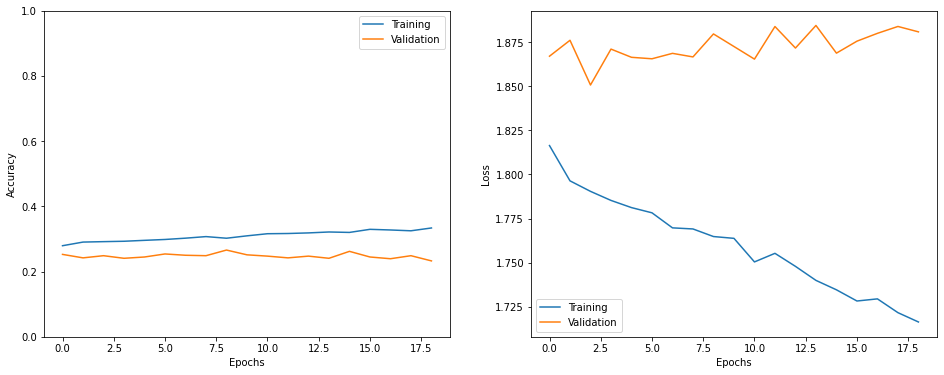

In [90]:
show_history(h)

In [40]:
test_seq = get_sequences(tokenizer, text_test)
label_test = names_to_ids(label_test)

In [41]:
_=model.evaluate(test_seq, label_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 752
Make sure all arrays contain the same number of samples.